In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../hopfield/')
sys.path.append('../../../CorEx/')

In [2]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

import utils
from model import HopfieldNet, SmallWorldHopfieldNet
from experiments import test_for_any_valid_memory_recall, test_for_exact_memory_recall, test_sw_hopfield_any_valid_pattern, test_sw_hopfield_exact_pattern
from utils import gen_partial_pattern, cnt_patterns_present, cnt_pattern_matches, plot_network_performance

### Run simple hopfield network

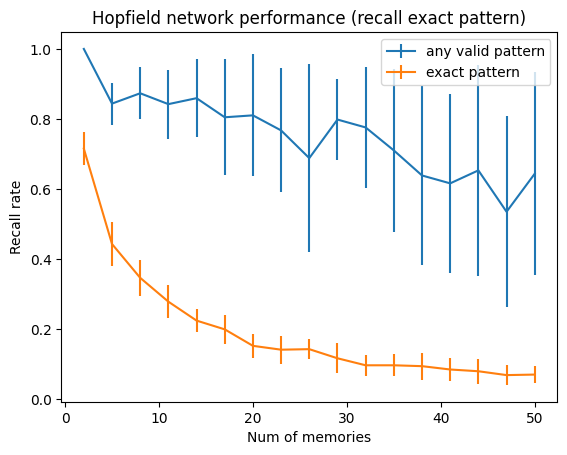

In [61]:
plot_network_performance(*test_for_any_valid_memory_recall(100), label = 'any valid pattern')
plot_network_performance(*test_for_exact_memory_recall(100), label = 'exact pattern')
#run_vanilla_hopfield()

Sparsity Rate:  0.2058705882352941 0.2
Sparsity Rate:  0.40198176470588237 0.4
Sparsity Rate:  0.5979111764705882 0.6
Sparsity Rate:  0.7939841176470588 0.8
Sparsity Rate:  0.9800864705882353 1


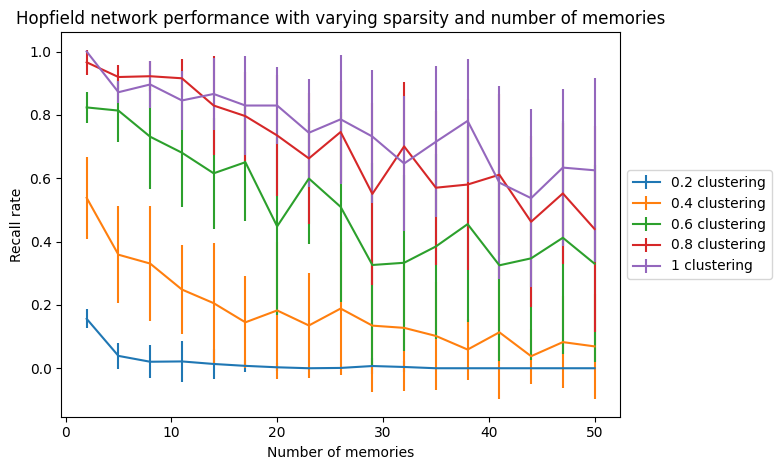

In [6]:
test_sparse_hopfield()

Sparsity Rate:  0.20594529411764706 0.2
Sparsity Rate:  0.40179764705882354 0.4
Sparsity Rate:  0.5979258823529412 0.6
Sparsity Rate:  0.7939005882352941 0.8
Sparsity Rate:  0.9800000000000001 1


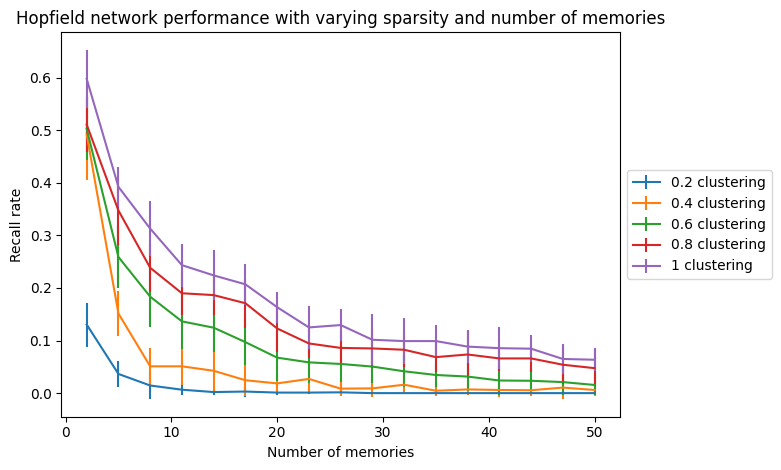

Sparsity Rate:  0.20586647058823526 0.2
Sparsity Rate:  0.4019311764705881 0.4
Sparsity Rate:  0.5979488235294117 0.6
Sparsity Rate:  0.7939129411764705 0.8
Sparsity Rate:  0.9801217647058823 1


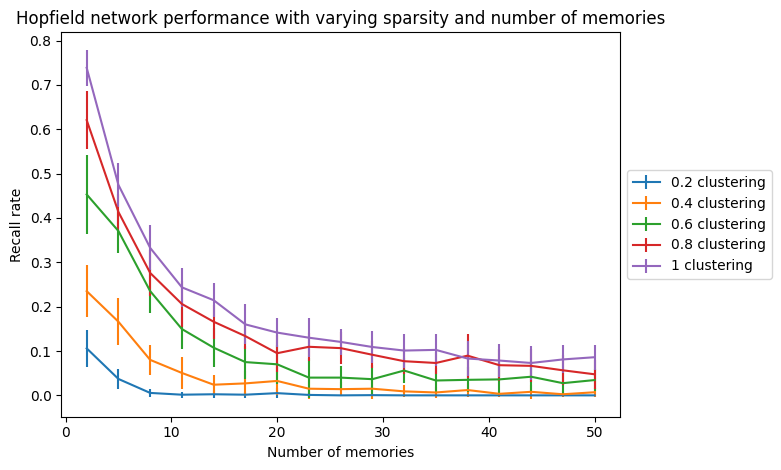

Sparsity Rate:  0.20592941176470586 0.2
Sparsity Rate:  0.40198588235294125 0.4
Sparsity Rate:  0.5979923529411765 0.6
Sparsity Rate:  0.7938658823529412 0.8
Sparsity Rate:  0.9800111764705882 1


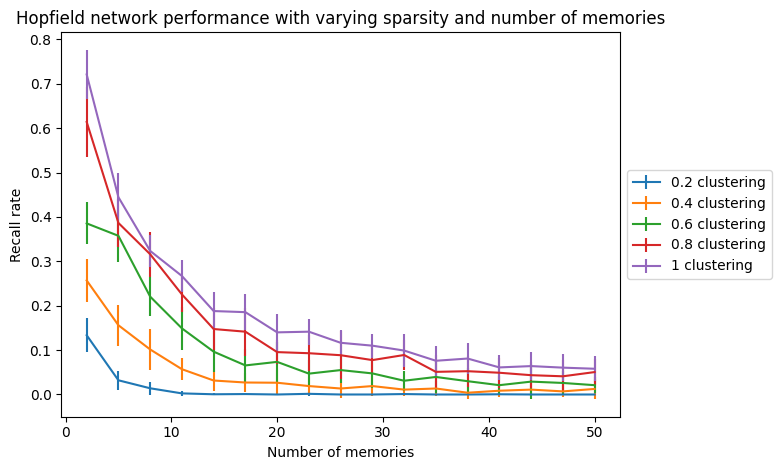

Sparsity Rate:  0.2058541176470588 0.2
Sparsity Rate:  0.4019164705882354 0.4
Sparsity Rate:  0.5978100000000001 0.6
Sparsity Rate:  0.7939135294117647 0.8
Sparsity Rate:  0.9801358823529411 1


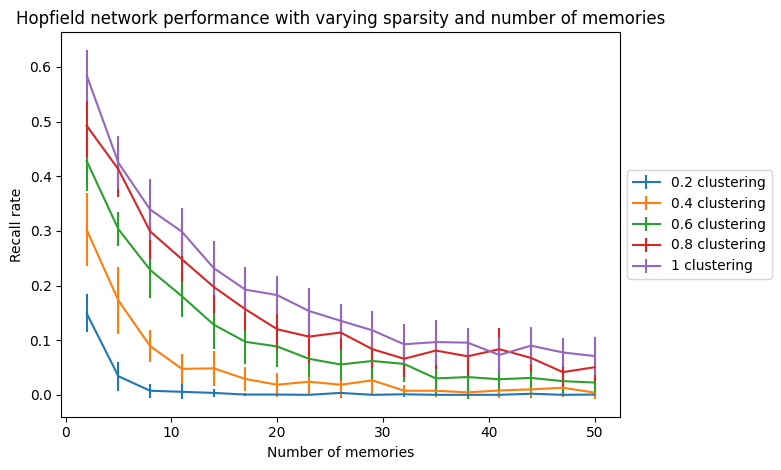

Sparsity Rate:  0.20594235294117647 0.2
Sparsity Rate:  0.40182529411764706 0.4
Sparsity Rate:  0.5979141176470588 0.6
Sparsity Rate:  0.7938717647058822 0.8
Sparsity Rate:  0.980154705882353 1


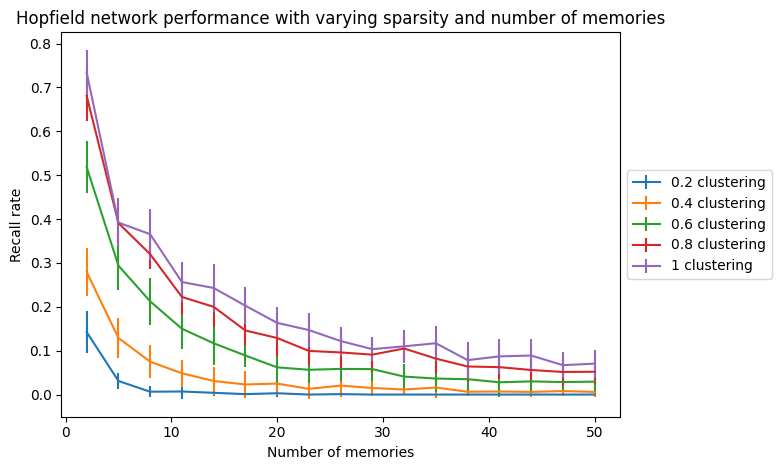

In [12]:
for i in range(5):
    test_sw_hopfield_exact_pattern()

In [ ]:
for i in range(5):
    test_sw_hopfield_any_pattern()

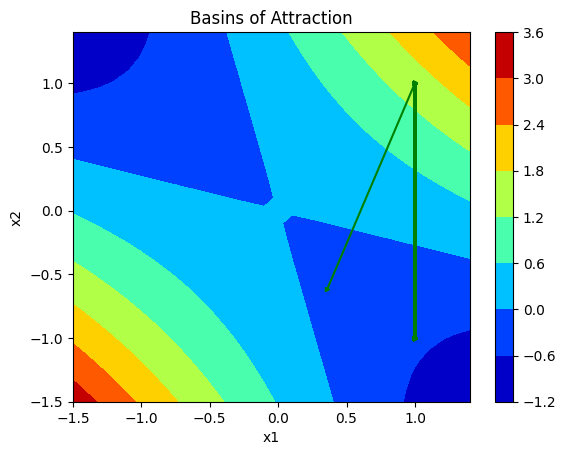

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from model import HopfieldNet

# Generate a Hopfield network with 3 attractor states
patterns = np.array([[1, 1, -1, -1], [-1, -1, 1, 1], [1, -1, 1, -1]])
n_neurons = patterns.shape[1]
hopfield_net = HopfieldNet(n_neurons)
hopfield_net.store(patterns)

# Define the energy landscape
resolution = 0.1
x = np.arange(-1.5, 1.5, resolution)
y = np.arange(-1.5, 1.5, resolution)
X, Y = np.meshgrid(x, y)
energy_landscape = np.zeros((len(x), len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        energy_landscape[i, j] = hopfield_net.energy([np.array([x[i], y[j], x[i], y[j]])])[0]

# Visualize the energy landscape
plt.figure()
plt.contourf(X, Y, energy_landscape.T, cmap=plt.cm.jet)
plt.colorbar()
plt.title('Energy Landscape')
plt.xlabel('x1')
plt.ylabel('x2')

# Simulate the state trajectory starting from a random initial state
n_steps = 100
x_init = np.random.rand(n_neurons) * 2 - 1
x_traj = hopfield_net.simulate(x_init, n_steps)

# Visualize the state trajectory and the basins of attraction
#plt.figure()
# for i in range(n_steps):
#     state = x_traj[i]
#     energy = hopfield_net.energy([state])
#     attractor = np.argmin(np.sum((patterns - state)**2, axis=1))
#     color = ['r', 'g', 'b'][attractor]
#     #plt.plot(state[0], state[1], color=color, marker='o', markersize=3)
    
plt.plot(x_traj[:, 0], x_traj[:, 1], '->', color='g', markersize=3)
plt.title('Basins of Attraction')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [31]:
x = np.empty((0, 10))

In [39]:
x = np.concatenate([x, np.ones((1, 10))], axis = 0)

In [40]:
np.concatenate([x, np.ones((1, 10))], axis = 0)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [43]:
(x * 3)**2

array([[9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

In [73]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

### CorEx Decomposition

In [17]:
import corex as ce

X = np.array([[0,0,0,0,0], # A matrix with rows as samples and columns as variables.
              [0,0,0,1,1],
              [1,1,1,0,0],
              [1,1,1,1,1]], dtype=int)

layer1 = ce.Corex(n_hidden=2)  # Define the number of hidden factors to use.
layer1.fit(X)

layer1.clusters  # Each variable/column is associated with one Y_j
# array([0, 0, 0, 1, 1])
layer1.labels[0]  # Labels for each sample for Y_0
# array([0, 0, 1, 1])
layer1.labels[1]  # Labels for each sample for Y_1
# array([0, 1, 0, 1])
layer1.tcs  # TC(X;Y_j) (all info measures reported in nats). 
# array([ 1.385,  0.692])
# TC(X_Gj) >=TC(X_Gj ; Y_j)
# For this example, TC(X1,X2,X3)=1.386, TC(X4,X5) = 0.693

array([1.38479546, 0.69214764])

In [22]:
layer1.transform(X)

array([[1, 0],
       [1, 1],
       [0, 0],
       [0, 1]])